<a href="https://colab.research.google.com/github/fathanzys/Data/blob/main/0102522025_UAS_DataMining.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**1. Import Library**

In [3]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv('data_balita.csv')

#**2. Data Pre Processing**

In [5]:
Q1 = df['Tinggi Badan (cm)'].quantile(0.25)
Q3 = df['Tinggi Badan (cm)'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
df_cleaned = df[(df['Tinggi Badan (cm)'] >= lower_bound) & (df['Tinggi Badan (cm)'] <= upper_bound)]

In [6]:
X = df_cleaned.drop('Status Gizi', axis=1)
y = df_cleaned['Status Gizi']

In [7]:
le = LabelEncoder()
X['Jenis Kelamin'] = le.fit_transform(X['Jenis Kelamin'])

In [8]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42, stratify=y)

#**3. Data Mining**

###**3.1 Model KNN**

In [10]:
k_range = range(1, 11)
cv_scores_knn = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_scaled, y, cv=3, scoring='accuracy')
    cv_scores_knn.append(scores.mean())

best_k = k_range[np.argmax(cv_scores_knn)]

In [26]:
knn_model = KNeighborsClassifier(n_neighbors=best_k, weights='distance')
knn_model.fit(X_train, y_train)
y_pred_knn = knn_model.predict(X_test)

acc_knn = accuracy_score(y_test, y_pred_knn)
print("Accuracy Decision Tree:", acc_knn)
print(classification_report(y_test, y_pred_knn))

Accuracy Decision Tree: 0.999007977514157
                  precision    recall  f1-score   support

          normal       1.00      1.00      1.00     13552
severely stunted       1.00      1.00      1.00      3966
         stunted       1.00      0.99      1.00      2763
          tinggi       1.00      1.00      1.00      3912

        accuracy                           1.00     24193
       macro avg       1.00      1.00      1.00     24193
    weighted avg       1.00      1.00      1.00     24193



###**3.2 Model Decision Tree**

In [12]:
depth_range = range(1, 21)
cv_scores_dt = []
for depth in depth_range:
    dt = DecisionTreeClassifier(max_depth=depth, class_weight='balanced', random_state=42)
    scores = cross_val_score(dt, X_scaled, y, cv=3, scoring='accuracy')
    cv_scores_dt.append(scores.mean())

best_depth = depth_range[np.argmax(cv_scores_dt)]

In [25]:
dt_model = DecisionTreeClassifier(max_depth=best_depth, class_weight='balanced', random_state=42)
dt_model.fit(X_train, y_train)
y_pred_dt = dt_model.predict(X_test)

acc_dt = accuracy_score(y_test, y_pred_dt)
print("Accuracy Decision Tree:", acc_dt)
print(classification_report(y_test, y_pred_dt))

Accuracy Decision Tree: 0.9854503368743025
                  precision    recall  f1-score   support

          normal       1.00      0.98      0.99     13552
severely stunted       1.00      0.97      0.98      3966
         stunted       0.90      0.99      0.94      2763
          tinggi       1.00      1.00      1.00      3912

        accuracy                           0.99     24193
       macro avg       0.97      0.99      0.98     24193
    weighted avg       0.99      0.99      0.99     24193



###**3.3 Model Logistic Regression**

In [35]:
from sklearn.linear_model import LogisticRegression

log_model = LogisticRegression(class_weight='balanced', max_iter=1000)
log_model.fit(X_train, y_train)
y_pred_log = log_model.predict(X_test)

acc_log = accuracy_score(y_test, y_pred_log)
print("Accuracy Logistic Regression:", acc_log)
print(classification_report(y_test, y_pred_log))

Accuracy Logistic Regression: 0.7234323978010169
                  precision    recall  f1-score   support

          normal       0.93      0.67      0.78     13552
severely stunted       0.73      0.75      0.74      3966
         stunted       0.46      0.73      0.56      2763
          tinggi       0.57      0.87      0.69      3912

        accuracy                           0.72     24193
       macro avg       0.67      0.75      0.69     24193
    weighted avg       0.79      0.72      0.73     24193



#**4. Evaluasi**

In [36]:
y_pred_knn = knn_model.predict(X_test)
y_pred_dt = dt_model.predict(X_test)
y_pred_log = log_model.predict(X_test)

In [23]:
acc_knn = accuracy_score(y_test, y_pred_knn)
acc_dt = accuracy_score(y_test, y_pred_dt)
acc_log = accuracy_score(y_test, y_pred_log)

cv_knn = cross_val_score(knn_model, X_scaled, y, cv=5).mean()
cv_dt = cross_val_score(dt_model, X_scaled, y, cv=5).mean()
cv_log = cross_val_score(log_model, X_scaled, y, cv=5).mean()

print("--- Hasil Evaluasi Model ---")
print(f"KNN             | Akurasi Uji: {acc_knn:.4f} | Rata-rata CV: {cv_knn:.4f}")
print(f"Decision Tree   | Akurasi Uji: {acc_dt:.4f} | Rata-rata CV: {cv_dt:.4f}")
print(f"Logistic Regression             | Akurasi Uji: {acc_log:.4f} | Rata-rata CV: {cv_log:.4f}")

--- Hasil Evaluasi Model ---
KNN             | Akurasi Uji: 0.9990 | Rata-rata CV: 0.5286
Decision Tree   | Akurasi Uji: 0.9855 | Rata-rata CV: 0.4685
Logistic Regression             | Akurasi Uji: 0.5524 | Rata-rata CV: 0.6039


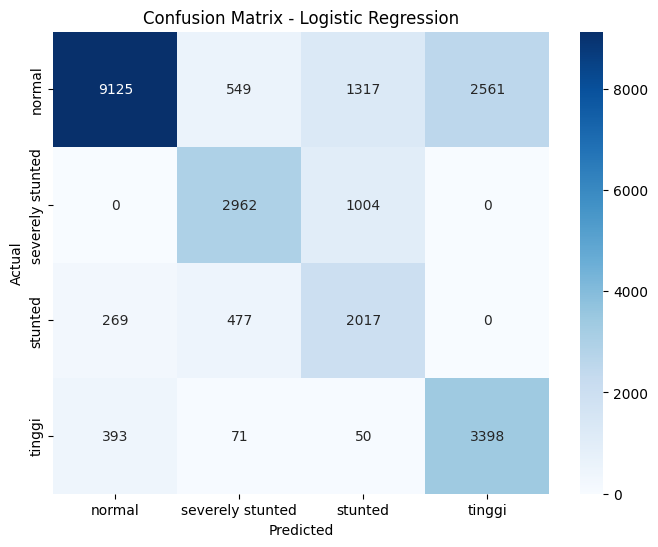

In [30]:
cm = confusion_matrix(y_test, y_pred_log)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=log_model.classes_, yticklabels=log_model.classes_)
plt.title('Confusion Matrix - Logistic Regression')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

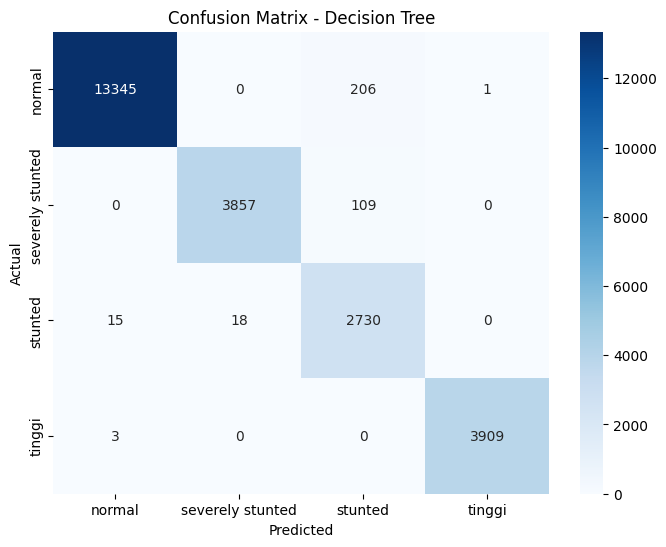

In [29]:
cm = confusion_matrix(y_test, y_pred_dt)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=dt_model.classes_, yticklabels=dt_model.classes_)
plt.title('Confusion Matrix - Decision Tree')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

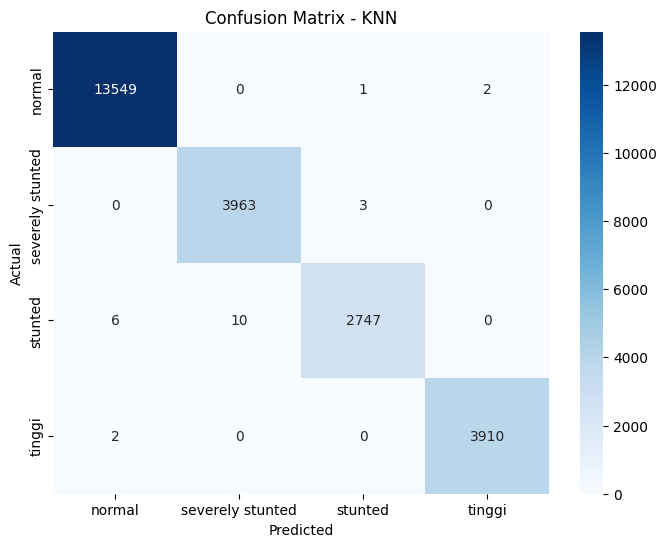

In [31]:
cm = confusion_matrix(y_test, y_pred_knn)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=knn_model.classes_, yticklabels=knn_model.classes_)
plt.title('Confusion Matrix - KNN')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

#**5. Visualisasi**

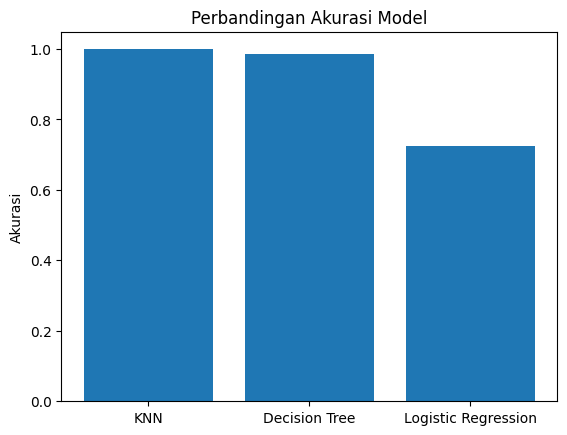

In [39]:
models = ['KNN', 'Decision Tree', 'Logistic Regression']
accuracies = [acc_knn, acc_dt, acc_log]  # Isi dengan nilai akurasi dari masing-masing

plt.bar(models, accuracies)
plt.title('Perbandingan Akurasi Model')
plt.ylabel('Akurasi')
plt.show()